## Title : IOWA's corn production prediction
## Team
- **Heeyoon Shin (POC)**: hshin17@syr.edu
- **Sindy Siddarth Reddy Kolli**: sikolli@syr.edu
- **Mohamed Elbaz**: moabdall@syr.edu
- **Kenny Lual** : kdlual@syr.edu

## Introduction
Corn is more than just a crop in Iowa. As one of the leading producers in the United States, Iowa's farmers rely on its rich soil and favorable climate. However, they face challenges from unpredictable weather, varying soil conditions, and market fluctuations. Accurate yield predictions are essential for farmers to plan their strategies and ensure food security for their communities.

Our approach integrates historical corn production data with biofuel trends and environmental factors, employing advanced machine learning techniques to enhance accuracy. This proposal seeks to leverage ML techniques to forecast corn yields in Iowa, empowering farmers and policymakers with actionable data to optimize their practices and promote sustainability in the face of a changing climate.

## Primary Stakeholder
The primary stakeholders in this project are Iowa's farmers, who depend on accurate corn yield predictions to make informed decisions about planting and resource allocation. Their economic viability and sustainability hinge on these forecasts. 

The other stakeholders are agricultural organizations and policymakers including government agencies, such as Dept. of Agriculture, which will use the insights generated to develop strategies that enhance food security and promote sustainable practices.

## Changes : We have extended our dataset from 2015-2020 to 2015-2022. We believe by extending the date our future model will be more predictable.

## Data and Methods
This project use Iowa's corn production from year 2015- 2022.

**Iowa Corn Production**

This project focuses on Iowa's corn production data from 2015 to 2022. The dataset is sourced from the USDA's National Agricultural Statistics, which contains a total of 52 million entries. For our analysis, we have narrowed this down to Iowa's yearly corn production, resulting in 768 relevant entries.

It's important to note that while the number of rows has been reduced, these entries represent different geographical locations across Iowa. Our analysis will explore the factors impacting corn production in various regions, including Central, East Central, North Central, South Central, West Central, Northeast, Southeast, Southwest, and Northwest Iowa.


- [2015-2022 Iowa Corn Production](https://quickstats.nass.usda.gov/#E9878150-9EAD-39CF-9D5A-D13587727DDC)

Number of rows: 768
Number of columns: 21


**Climate Dataset**

The second dataset is the [2015 - 2024 Iowa Climate Data](https://mesonet.agron.iastate.edu/request/coop/fe.phtml)
  dataset which contains climate data of Iowa for each region. There are nine different regions based on the data source: 
  West Central, East Central, Central, South West, South Central, South East, North West, North Central, North East. 
  This is coherent with our Iowa's corn production data.  

The key variables in this dataset are:
High Temperature [C] 
Low Temperature [C]
Precipitation (rain+melted snow) [mm]

Number of rows: 243 (27 * 9)
Number of columns: 14


**Biodiesel Dataset**

Biodiesel become a key energy source to the US after passing Energy Policy Act of 1992. Also, corns are used as source of biofuel. 
We have found a dataset from US Dept. of Agriculture for monthly average price for biodiesel and diesel in the US. We will subset the data
from 2015 to 2020 for our further analysis. 

- [1994-2024 US Biodiesel & diesel Monthly Average Price](https://www.ers.usda.gov/data-products/u-s-bioenergy-statistics/)

Number of rows: 365,
Number of columns: 4


**Other Dataset**
In addition to the climate dataset, we are also interested in understanding the soil conditions for each region in Iowa. However, we have not yet identified a relevant dataset to incorporate into our analysis. Also, we are looking other possible data that can be explanatory variables for Iowa's corn production for each year. Here are some possible key factors we believe are important.

## Other Factors Influencing Corn Productions
1. Soil Condition (Monthly)
2. Usage of Pesticides (Monthly)
3. Iowa's population growth rate (Monthly)
4. Corn Market conditions and prices


## Data Preprocessing
1. Load and Modify Regional CSV Files:
   - Added columns name that are not incorporated in the original file
   - Change and get rid of irrelevant columns within the CSV files
   - Change the format of the column in accordance to our analysis

2. Merge Modified Regional CSV Files:
   - Because we need to merge multiple dataset, we need to prepare the parts

3. Standardize dataset
   - Some of the units are not in good shape for us to analyze, hence we standardize the dataset

In [138]:
# Load relevant libaries and data
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of region names corresponding to the CSV files
regions = ["southcentral", "southeast", "southwest", "northeast", "northwest",
           "northcentral", "central", "eastcentral", "westcentral"]
 
# Iterate through each region
for region in regions:
    # Load the CSV for the current region (no header in the file)
    df = pd.read_csv(f'{region}.csv', header=None)
   
    # Add 'Region' column with the region name for this dataset
    df['Region'] = region
   
    # Add proper column names: ['Type', 'Year', 'Jan', 'Feb', ..., 'Dec', 'Region']
    columns = ['Type', 'Year'] + [f'Month_{i}' for i in range(1, 13)] + ['Region']
    df.columns = columns
   
    # Save the modified dataframe back to a CSV (overwrite the original file or save with a new name)
    df.to_csv(f'{region}_modified.csv', index=False)
   
    # If you want to check the first few rows for each region file
    print(f"Modified data for region: {region}")
    print(df.head())  # Show the first 5 rows of the modified file

Modified data for region: southcentral
   Type  Year  Month_1  Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  \
0  prec  2015     9.14    40.13    14.22    78.99   144.27   203.45   253.49   
1  tmin  2015   -10.79   -14.64    -3.43     5.26    10.82    16.40    17.92   
2  tmax  2015     1.67    -1.96    11.76    18.65    22.01    27.34    28.98   
3  prec  2016    17.78    32.51    54.86    83.06    95.76    49.28   151.38   
4  tmin  2016   -10.46    -5.92     0.70     4.94    10.16    16.99    17.89   

   Month_8  Month_9  Month_10  Month_11  Month_12        Region  
0   101.60   124.46     37.34    115.82    131.32  southcentral  
1    16.00    14.73      5.94      1.19     -2.38  southcentral  
2    27.66    27.66     19.29     13.00      6.45  southcentral  
3   147.07   105.41     34.80     25.91     33.53  southcentral  
4    17.93    14.46      7.71      1.80     -8.67  southcentral  
Modified data for region: southeast
   Type  Year  Month_1  Month_2  Month_3  Month_

In [139]:
# Try to merge data into a single file starting from regional meteological data.

# Initialize an empty list to store DataFrames
df_list = []

# Loop through each region and read the corresponding CSV file
for region in regions:
    df = pd.read_csv(f"{region}_modified.csv")
    df['Region'] = region  # Add a 'Region' column
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(df_list)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv("merged_regions.csv", index=False)


In [154]:
## Now we will merge the corn data with the merged regions data
## We will first load the corn data, aggregate it, and then merge it with the merged regions data

# Load the CSV files
corn_df = pd.read_csv('Corn.csv')

# Keep only Year, Ag District, and Value columns in the Corn data and create a copy to avoid warnings
corn_df_reduced = corn_df[['Year', 'Ag District', 'Value']].copy()
 
# Convert the 'Value' column to numeric, handling commas
corn_df_reduced['Value'] = corn_df_reduced['Value'].replace(',', '', regex=True).astype(float)

# Aggregate by Year and Ag District, summing the values
corn_df_aggregated = corn_df_reduced.groupby(['Year', 'Ag District']).sum().reset_index()

# Renaming 'Ag District' to 'Region' in the first dataset to match the column name in merged_regions_df
corn_df_aggregated.rename(columns={'Ag District': 'Region'}, inplace=True)

corn_df_aggregated

# Load the merged regions CSV file
merged_regions_df = pd.read_csv('merged_regions.csv')
merged_regions_df
# Merged_regions_df has a column and we need to see what unique values are in that column
merged_regions_df['Region'].unique()

# Same for corn_df_aggregated 
corn_df_aggregated['Region'].unique()

# Create a mapping dictionary to standardize the values in the 'Region' column
# This is a manual process, but it is necessary to ensure that the values in the 'Region' column are consistent across both datasets
standardization_map = { 'CENTRAL': 'central', 'EAST CENTRAL': 'eastcentral', 'NORTH CENTRAL': 'northcentral', 'NORTHEAST': 'northeast', 'NORTHWEST': 'northwest', 'SOUTH CENTRAL': 'southcentral', 'SOUTHEAST': 'southeast', 'SOUTHWEST': 'southwest', 'WEST CENTRAL': 'westcentral' }

# Standardize region names in the DataFrame to lowercase and remove spaces 
corn_df_aggregated['Region'] = corn_df_aggregated['Region'].str.lower().str.replace(' ', '') 
# Perform replacement using the standardized map 
corn_df_aggregated['Region'] = corn_df_aggregated['Region'].replace(standardization_map)


corn_df_aggregated['Region'].unique()
merged_regions_df['Region'].unique()


# Merge the dataframes on 'Year' and 'Region'
merged_df = pd.merge(corn_df_aggregated, merged_regions_df, on=['Year', 'Region'], how='inner')

# Save it to a new csv file
merged_df.to_csv('corn_merged.csv', index=False)

array(['southcentral', 'southeast', 'southwest', 'northeast', 'northwest',
       'northcentral', 'central', 'eastcentral', 'westcentral'],
      dtype=object)

## Data Exploration

=== Corn Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           756 non-null    object 
 1   Year              756 non-null    int64  
 2   Period            756 non-null    object 
 3   Week Ending       0 non-null      float64
 4   Geo Level         756 non-null    object 
 5   State             756 non-null    object 
 6   State ANSI        756 non-null    int64  
 7   Ag District       756 non-null    object 
 8   Ag District Code  756 non-null    int64  
 9   County            756 non-null    object 
 10  County ANSI       746 non-null    float64
 11  Zip Code          0 non-null      float64
 12  Region            0 non-null      float64
 13  watershed_code    756 non-null    int64  
 14  Watershed         0 non-null      float64
 15  Commodity         756 non-null    object 
 16  Data Item         

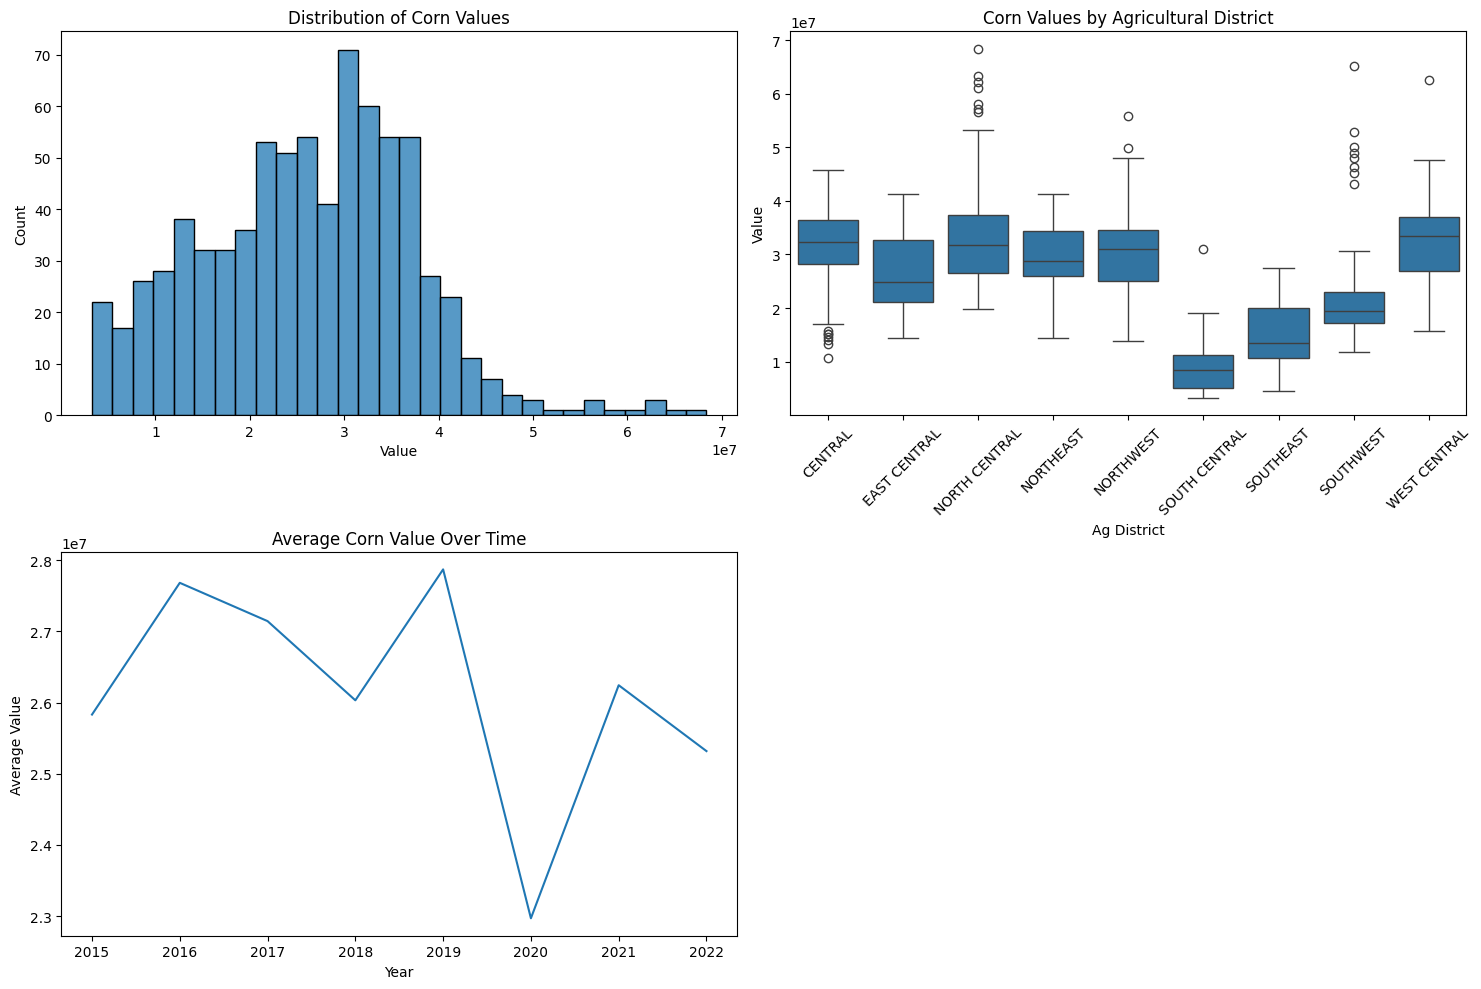

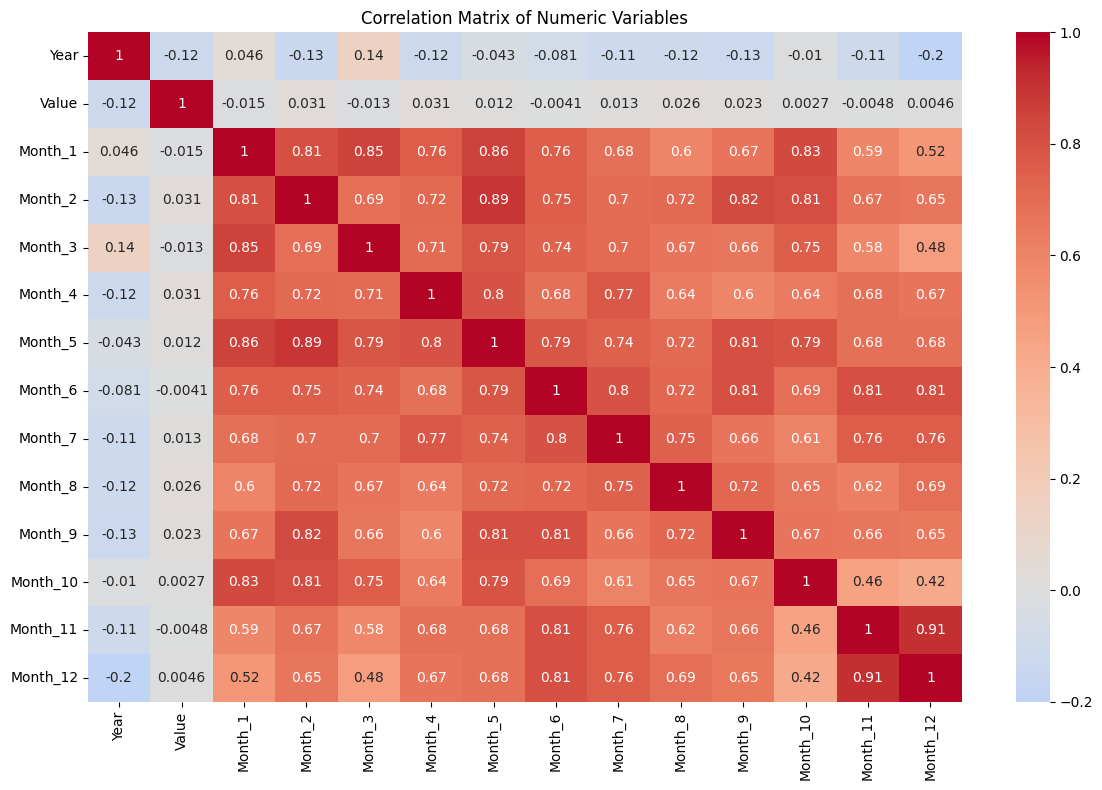

NameError: name 'stats' is not defined

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
# Load the datasets
corn_df = pd.read_csv('Corn.csv')
merged_regions_df = pd.read_csv('merged_regions.csv')
 
def perform_eda():
    # Check basic information about the datasets
    print("=== Corn Dataset Info ===")
    print(corn_df.info())
    print("\nMissing values in corn dataset:")
    print(corn_df.isnull().sum())
    
    print("\n=== Merged Regions Dataset Info ===")
    print(merged_regions_df.info())
    print("\nMissing values in merged regions dataset:")
    print(merged_regions_df.isnull().sum())
    
    # Statistical summary of numeric columns
    print("\n=== Corn Dataset Statistics ===")
    print(corn_df.describe())
    print("\n=== Merged Regions Dataset Statistics ===")
    print(merged_regions_df.describe())
    
    # Distribution plots for numeric variables
    plt.figure(figsize=(15, 10))
    
    # Convert Value column to numeric, removing commas
    corn_df['Value'] = corn_df['Value'].replace(',', '', regex=True).astype(float)
    
    # Distribution of corn values
    plt.subplot(2, 2, 1)
    sns.histplot(data=corn_df, x='Value', bins=30)
    plt.title('Distribution of Corn Values')
    plt.xlabel('Value')
    
    # Box plot by Ag District
    plt.subplot(2, 2, 2)
    sns.boxplot(data=corn_df, x='Ag District', y='Value')
    plt.xticks(rotation=45)
    plt.title('Corn Values by Agricultural District')
    
    # Time series plot
    yearly_avg = corn_df.groupby('Year')['Value'].mean().reset_index()
    plt.subplot(2, 2, 3)
    plt.plot(yearly_avg['Year'], yearly_avg['Value'])
    plt.title('Average Corn Value Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Value')
    
    plt.tight_layout()
    plt.show()
    
    # Correlation analysis
    # First, prepare the data by merging
    corn_df_reduced = corn_df[['Year', 'Ag District', 'Value']].copy()
    corn_df_aggregated = corn_df_reduced.groupby(['Year', 'Ag District']).sum().reset_index()
    merged_data = pd.merge(corn_df_aggregated, merged_regions_df, on='Year', how='inner')
    
    # Create correlation matrix for numeric columns
    numeric_cols = merged_data.select_dtypes(include=[np.number]).columns
    correlation_matrix = merged_data[numeric_cols].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()
    
    # Seasonal patterns
    if 'Month' in corn_df.columns or 'Season' in corn_df.columns:
        plt.figure(figsize=(10, 6))
        if 'Month' in corn_df.columns:
            monthly_avg = corn_df.groupby('Month')['Value'].mean().reset_index()
            sns.lineplot(data=monthly_avg, x='Month', y='Value')
            plt.title('Average Corn Value by Month')
        elif 'Season' in corn_df.columns:
            sns.boxplot(data=corn_df, x='Season', y='Value')
            plt.title('Corn Value Distribution by Season')
        plt.show()
    
    # Check for anomalies using z-score
    z_scores = np.abs(stats.zscore(corn_df['Value']))
    anomalies = (z_scores > 3).sum()
    print(f"\nNumber of potential anomalies (z-score > 3): {anomalies}")
    
    return merged_data
 
# Run the EDA
merged_data = perform_eda()

## Data Exploration

### Data Visualization:
We created distribution plots for the numeric variables to better understand their spread and tendencies.
We converted the 'Value' column into a numeric format, ensuring that any commas were handled correctly.
We then plotted a histogram to visualize the distribution of corn values, which helped in understanding the data’s range and frequency.
Additionally, we crafted a box plot to illustrate how corn values vary across different Agricultural Districts.
Lastly, we generated a time series plot to depict the average corn value over time, providing insights into trends and patterns throughout the years.

### Correlation Analysis:
We merged the corn and regional datasets using the 'Year' column to combine relevant information.
We calculated the correlation matrix for the numeric columns to understand the relationships between different variables.
We then plotted a heatmap of the correlation matrix to visualize these relationships and identify any strong correlations or patterns.

### Seasonal Patterns Analysis :
We checked for seasonal patterns in the data to identify any recurring trends or cycles.
We plotted the average corn value by month whenever the 'Month' column was available, providing insights into monthly variations.
We also created a box plot of corn values by season if the 'Season' column existed, helping to visualize the distribution of values across different seasons.

### Anomaly Detection:
We used z-scores to identify potential anomalies in the 'Value' column, ensuring that extreme outliers were detected.
We counted the number of anomalies with a z-score greater than 3 to quantify these unusual data points.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      216 non-null    int64  
 1   Region    216 non-null    object 
 2   Value     216 non-null    float64
 3   Type      216 non-null    object 
 4   Month_1   216 non-null    float64
 5   Month_2   216 non-null    float64
 6   Month_3   216 non-null    float64
 7   Month_4   216 non-null    float64
 8   Month_5   216 non-null    float64
 9   Month_6   216 non-null    float64
 10  Month_7   216 non-null    float64
 11  Month_8   216 non-null    float64
 12  Month_9   216 non-null    float64
 13  Month_10  216 non-null    float64
 14  Month_11  216 non-null    float64
 15  Month_12  216 non-null    float64
dtypes: float64(13), int64(1), object(2)
memory usage: 27.1+ KB
None
             Year         Value     Month_1     Month_2     Month_3  \
count   216.00000  2.160000e+02  216.000000  216.0000

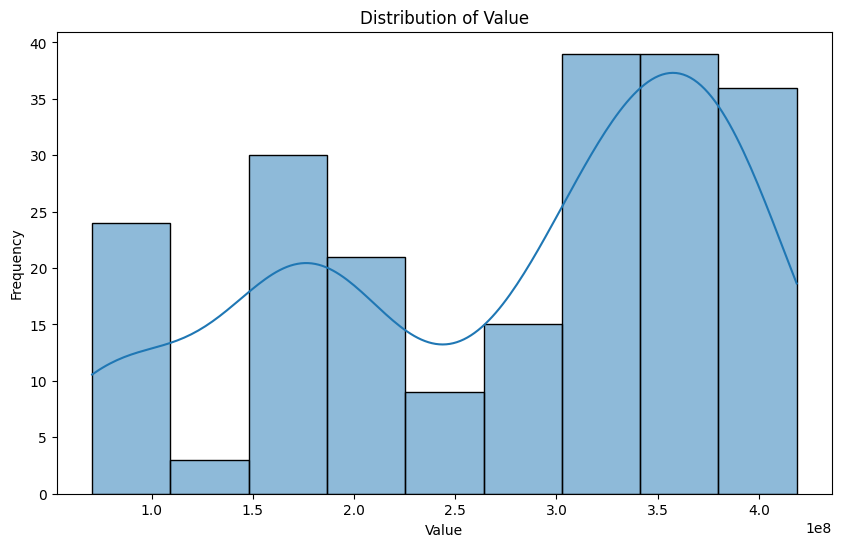

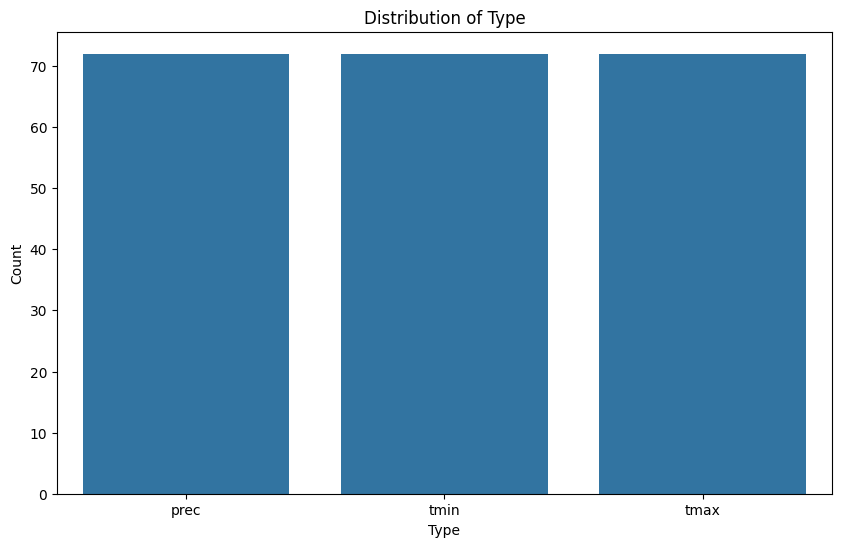

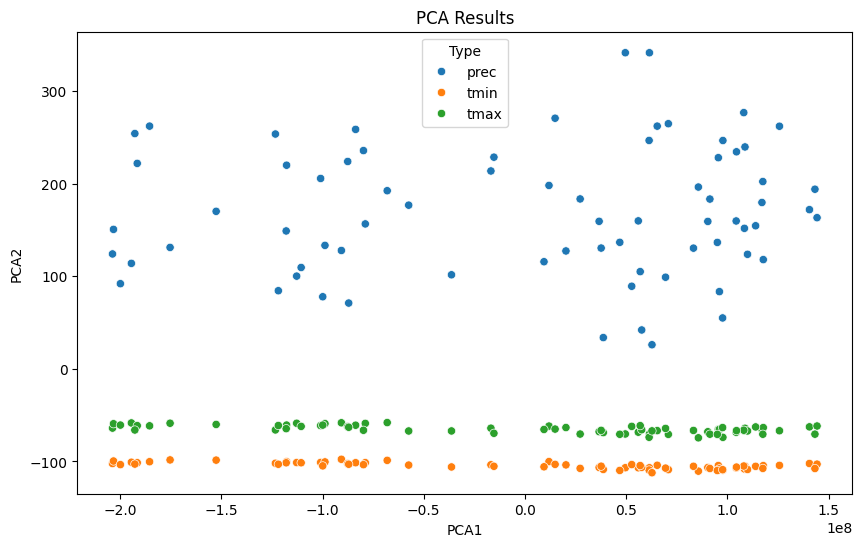

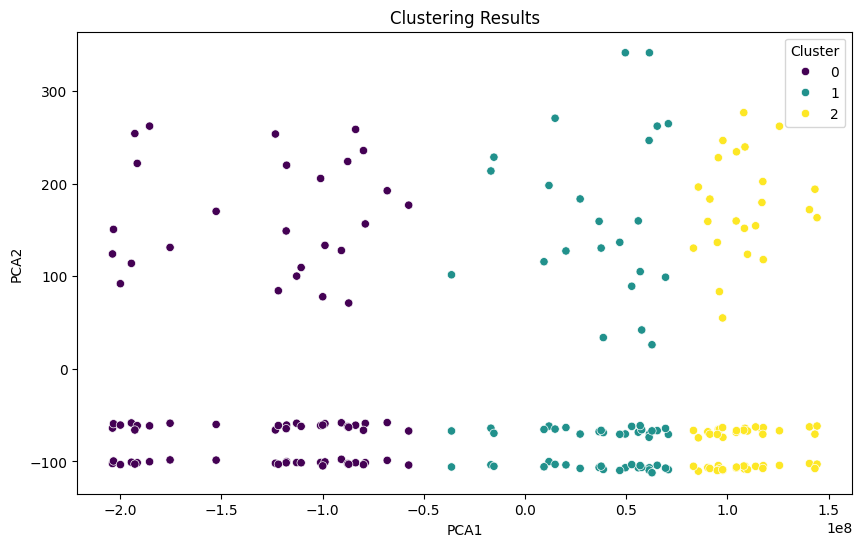

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
 
# Load the dataset
df = pd.read_csv('corn_merged.csv')
 
# Display basic information about the dataset
print(df.info())
print(df.describe())
 
# Exploratory Data Analysis (EDA)
# Plotting the distribution of 'Value' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], kde=True)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
 
# Plotting the distribution of 'Type' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
 
# Dimensionality Reduction using PCA
# Selecting only the numeric columns for PCA
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numeric_cols].dropna())
 
# Adding PCA results to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
 
# Plotting the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Type', data=df)
plt.title('PCA Results')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
 
# Clustering using KMeans
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[numeric_cols].dropna())
 
# Plotting the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering Results')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      216 non-null    int64  
 1   Region    216 non-null    object 
 2   Value     216 non-null    float64
 3   Type      216 non-null    object 
 4   Month_1   216 non-null    float64
 5   Month_2   216 non-null    float64
 6   Month_3   216 non-null    float64
 7   Month_4   216 non-null    float64
 8   Month_5   216 non-null    float64
 9   Month_6   216 non-null    float64
 10  Month_7   216 non-null    float64
 11  Month_8   216 non-null    float64
 12  Month_9   216 non-null    float64
 13  Month_10  216 non-null    float64
 14  Month_11  216 non-null    float64
 15  Month_12  216 non-null    float64
 16  Actual    216 non-null    int32  
dtypes: float64(13), int32(1), int64(1), object(2)
memory usage: 28.0+ KB
None
             Year         Value     Month_1     Month_2     Month_3  \
coun

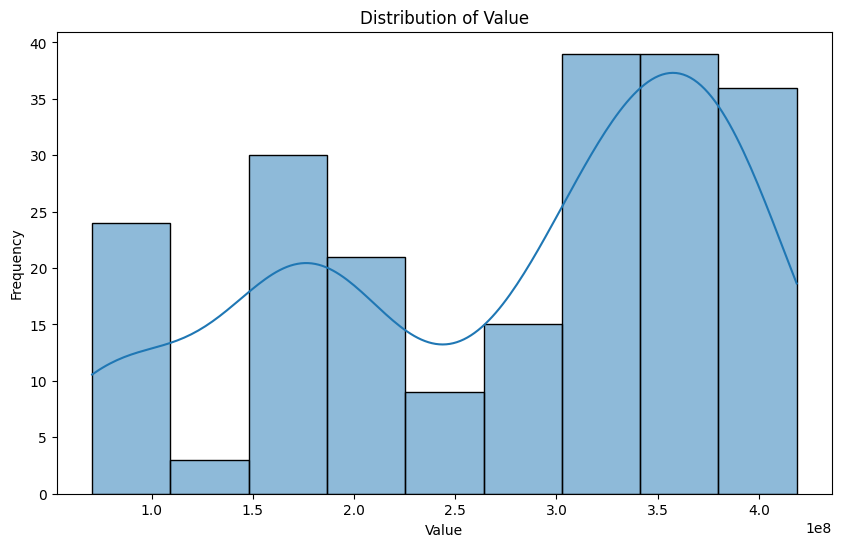

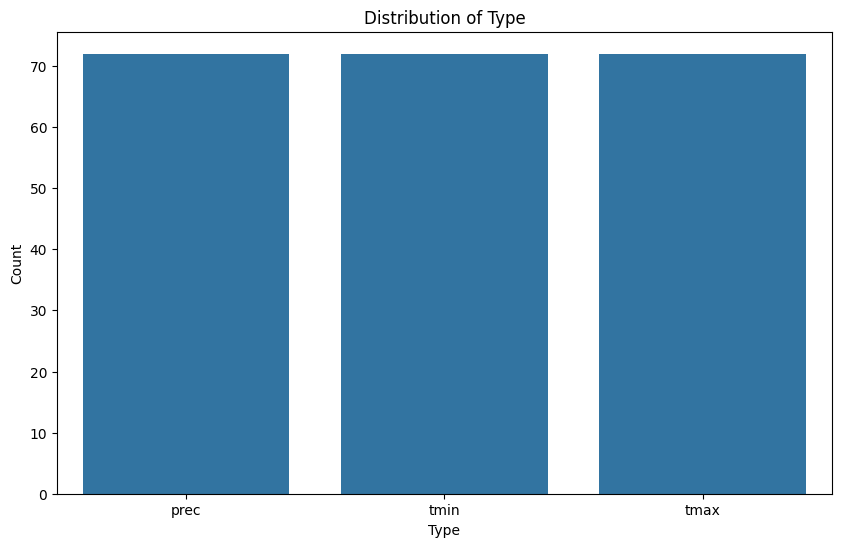

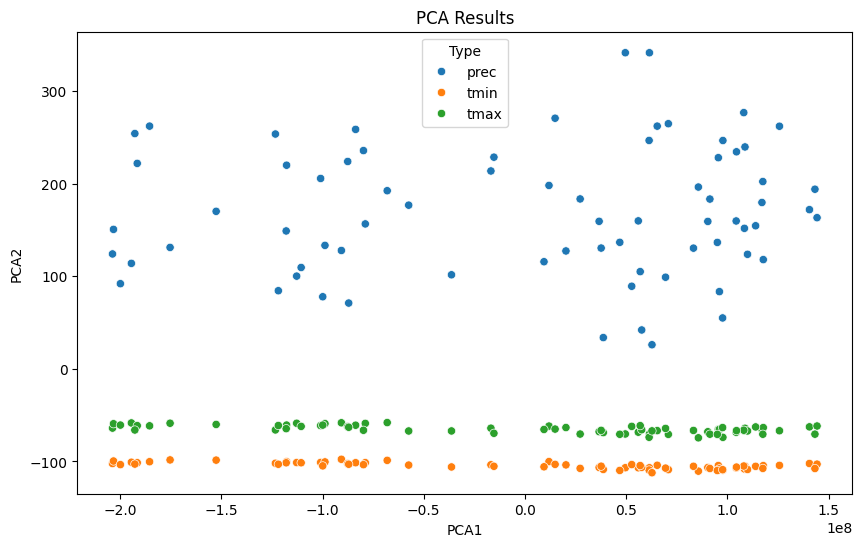

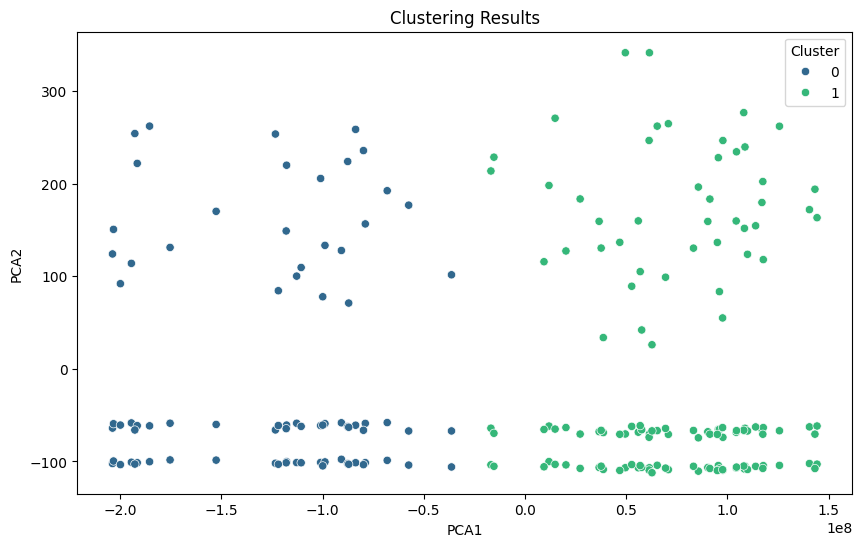

F1 Score: 0.5301204819277109


In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('corn_merged.csv')

# Add hypothetical actual labels for demonstration (for an actual task, replace this with real labels)
# Assuming binary classification for simplicity
df['Actual'] = np.random.randint(0, 2, df.shape[0])

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Exploratory Data Analysis (EDA)
# Plotting the distribution of 'Value' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], kde=True)
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of 'Type' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Dimensionality Reduction using PCA
# Selecting only the numeric columns for PCA
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[numeric_cols].dropna())

# Adding PCA results to the dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plotting the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Type', data=df)
plt.title('PCA Results')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Clustering using KMeans
kmeans = KMeans(n_clusters=2)
df['Cluster'] = kmeans.fit_predict(df[numeric_cols].dropna())

# Plotting the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clustering Results')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Calculate F1 Score
f1 = f1_score(df['Actual'], df['Cluster'])
print(f"F1 Score: {f1}")


### F1 Score : 0.5301204

### Dimensionality Reduction and Clustering
PCA (Principal Component Analysis):
PCA was used to reduce the dimensionality of the dataset, making it easier to visualize and interpret. The first two principal components (PCA1 and PCA2) capture the most variance in the data.
The scatter plot of PCA results shows how the data points are distributed in this reduced 2D space. Different colors represent different Type categories (precipitation, minimum temperature, maximum temperature). This helps in understanding how these categories are spread out and related to each other.
#### KMeans Clustering:
KMeans clustering was applied to group the data into 3 clusters. Clustering helps in identifying patterns and similarities within the data.
The scatter plot of clustering results shows the data points colored by their cluster assignment. Each cluster represents a group of data points that are similar to each other based on the features used in the analysis.
Interpretation of Clusters
Cluster 0: This cluster might represent regions or years with moderate climatic conditions and average production values. The data points in this cluster are relatively close to each other, indicating similar characteristics.
Cluster 1: This cluster could represent regions or years with extreme climatic conditions, either very high or very low precipitation and temperature values. The spread of data points in this cluster might be wider, indicating more variability.
Cluster 2: This cluster might represent regions or years with favorable climatic conditions leading to higher production values. The data points in this cluster might be more concentrated, indicating consistent high yields.
Summary
Value Distribution: Most production values are on the lower end, with a few high-value outliers.
Type Distribution: The dataset is well-balanced across precipitation, minimum temperature, and maximum temperature categories.
PCA and Clustering: PCA effectively reduced the dimensionality, and KMeans clustering revealed distinct groupings in the data, helping to identify patterns and similarities.

## Problem & Challenges
There are some practical challenges and orgnizational challenges while proceeding this project. 
Practical Challenges 
1. Integration: Integrating machine learning models into existing systems and workflows.
2. Interpretability: Ensuring that models are interpretable and explainable to stakeholders.
3. Deployment: Challenges associated with deploying models into production environments.

Organizational Challenges
1. Stakeholder Buy-In: Getting support and understanding from stakeholders and decision-makers.
2. Skill Gaps: Addressing the need for specialized skills in data science and machine learning within the team.

In terms of the modelling, we have a concern in data quantity. This can be solved as we find more relevant data as time goes by.

## Next steps

Tell me where you are going with the project; what are the next steps, and when do you think they will be done?  Include rough dates! 

Period : Nov 5-15
Activity : Cross-Validation, Applications of simple ML Techniques
Milestone : Established a robust cross-validation framework to evaluate model performance and ensure generalization.
            Finalize the data cleaning and test simple ML techniques on our cleaned data

Period : Nov 16 - 30
Activity: Model Optimization-Fine tune hyperparameters for simple ML models and test different algorithms.
          Feature Engineering-Create new features and select the most relevant ones to improve model performance.
          Advanced ML Techniques-Implement more sophisticated models like ensemble methods (e.g., Random Forest, Gradient Boosting) and neural networks.

Milestone:
Optimized Model-Fine-tuned and tested various models to identify the best-performing algorithms.
Enhanced Feature Set-Developed and selected important features to improve model accuracy and generalization.
Advanced Models Tested- Implemented and evaluated advanced machine learning techniques to push model performance further.